<a href="https://colab.research.google.com/github/dipayandas97/Spiking-Neural-Network/blob/master/Spike_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

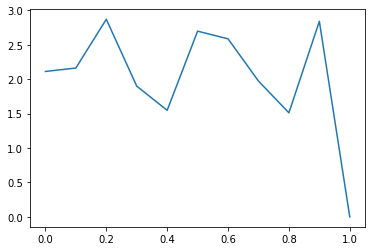

In [3]:
L = 1
dt = 0.1
time = np.arange(0, L+dt, dt)
signal = np.random.normal(loc=0, scale=1.0, size=time.shape[0])
signal += np.abs(np.min(signal))
plt.plot(time, signal)
plt.show()

#Temporal Contrast | Fixed Threshold based

##Encoding

Threshold: 0.350


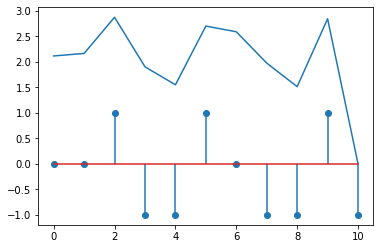

In [4]:
spikes = []
input_length = signal.shape[0]
factor = 0.5

#calculate running difference
diff = []
diff.append(0)

for t in range(1, input_length):
    diff.append(signal[t] - signal[t-1])

#calculate threshold
threshold = np.mean(diff) + factor*np.std(diff)

#generate spike train
for t in range(input_length):
    if diff[t] > threshold:
        spikes.append(1)
    elif diff[t] < -threshold:
        spikes.append(-1)
    else:
        spikes.append(0)
        
print('Threshold: {:.3f}'.format(threshold))
plt.plot(signal)
plt.stem(spikes, use_line_collection=True)
plt.show()

##Decoding

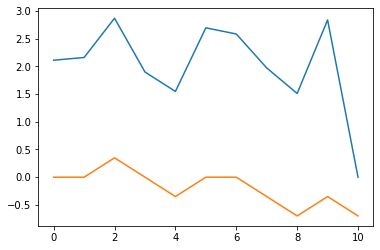

In [5]:
#spikes : encoded spike
#threshold : pre-determined threshold
#length = input_length
output_signal = np.zeros(len(spikes))

for t in range(1, input_length):
    if spikes[t] > 0:
        output_signal[t] = output_signal[t-1] + threshold
    elif spikes[t] < 0:
        output_signal[t] = output_signal[t-1] - threshold
    else:
        output_signal[t] = output_signal[t-1]

plt.plot(signal)
plt.plot(output_signal)
plt.show()

#Rank Order Coding (ROC)

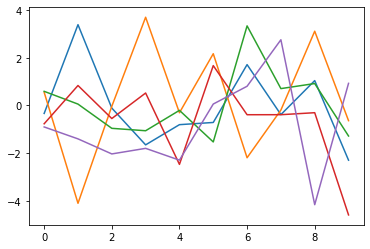

In [6]:
#5 dimensional input vector for 10 timesteps
T=10
signal = np.random.normal(loc=0, scale = 2, size=(T, 5))

for i in signal.T:
    plt.plot(i)

##Encoding

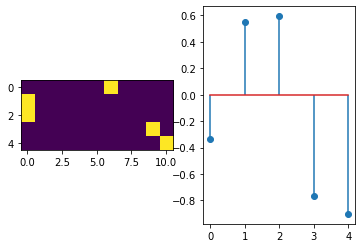

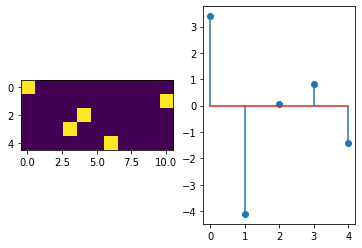

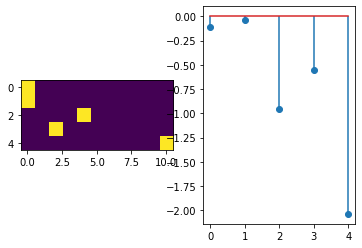

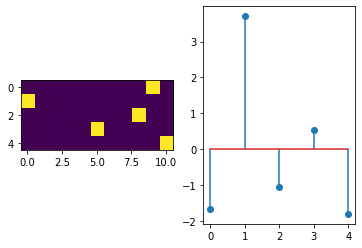

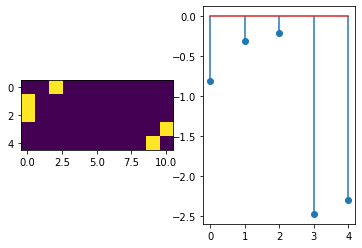

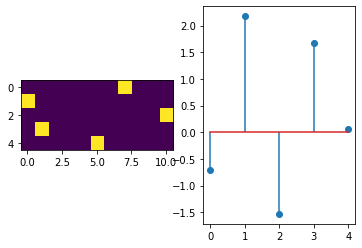

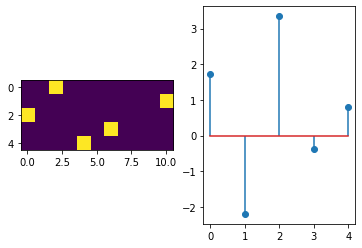

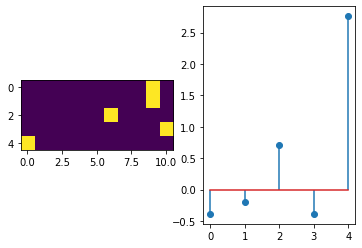

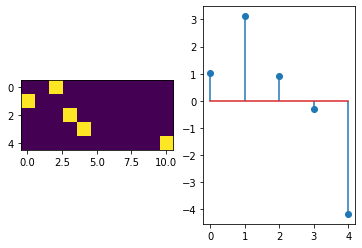

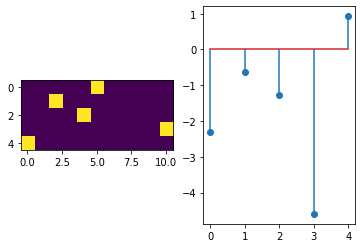

In [7]:
time_window = 10
spike_train = np.zeros((T, 5, time_window+1))

for t in range(signal.shape[0]):
    s = signal[t]
    s = np.max(s) - s
    latency = time_window * ((s - np.min(s))/(np.max(s) - np.min(s)))

    for i in range(latency.shape[0]): #iterate over each dimension of data
        spike_train[t][i][int(latency[i])] = 1        
    plt.subplot(1,2,1)
    plt.imshow(spike_train[t])
    plt.subplot(1,2,2)
    plt.stem(signal[t], use_line_collection=True)
    plt.show()

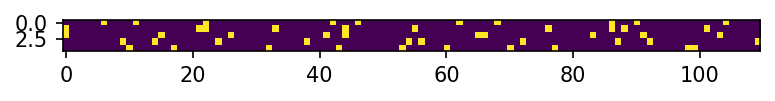

In [8]:
#Total encoded data

seq = spike_train[0]

for w in spike_train[1:]:
    seq = np.hstack((seq, w))
plt.figure(dpi=150)
plt.imshow(seq)

##Decoding

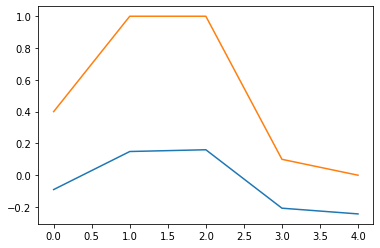

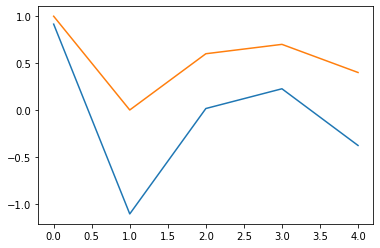

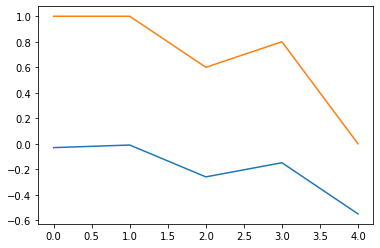

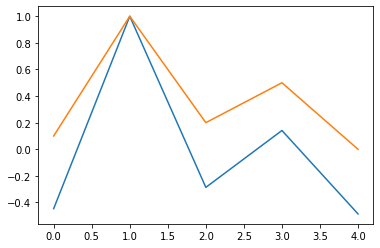

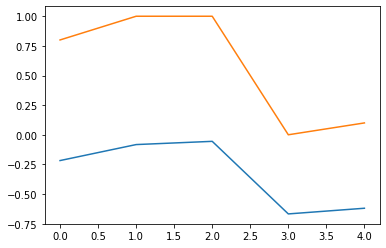

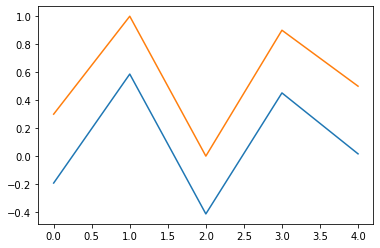

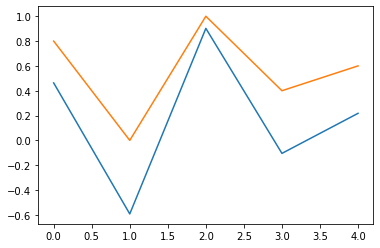

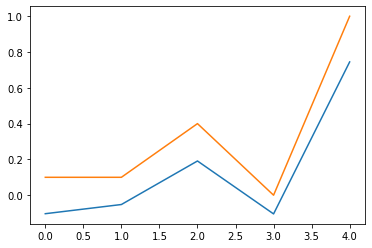

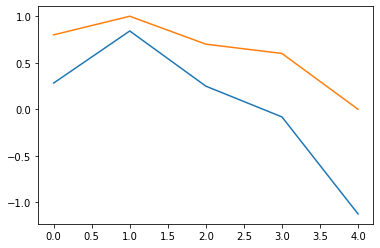

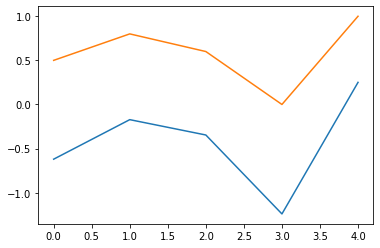

In [9]:
output_signal = []

for t in range(spike_train.shape[0]):
    f = spike_train[t]
    latency = []
    for d in range(f.shape[0]):
        latency.append(time_window - np.argmax(f[d])) #since actual signal is amplitude reversal of latency
    output_signal.append(latency)
    
    plt.plot(signal[t] / np.max(signal))
    plt.plot(latency / np.max(latency))
    plt.show()

#Rate Coding

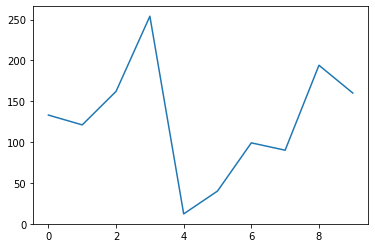

In [51]:
signal = np.random.randint(0,255,10)
plt.plot(signal)

##Encoding

<StemContainer object of 3 artists>

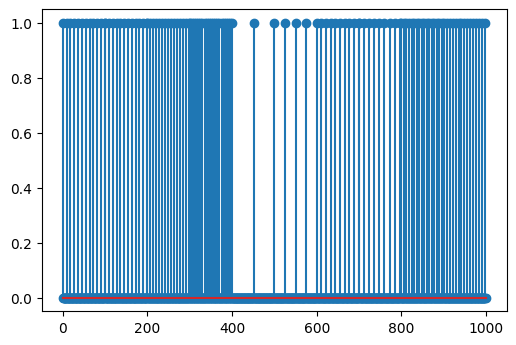

In [52]:
#max freq: 200 Hz (t=5ms)
#min freq: 10 Hz (t=100ms)
time_window = 100 #ms 
spike_train = []

for s in signal:
    freq = (s / 255) * 190 + 10 #considering input values belong to [0,255] :: transformed to freqs in range [10,200]
    t = (1 / freq) * 1000 #ms

    spikes = np.zeros(time_window)
    k=0
    while k<time_window:
        spikes[k] = 1
        k += int(t)
    spike_train.append(spikes)

spike_train = np.hstack(([x for x in spike_train]))    

plt.figure(dpi=100)
plt.stem(spike_train, use_line_collection=True)

##Decoding

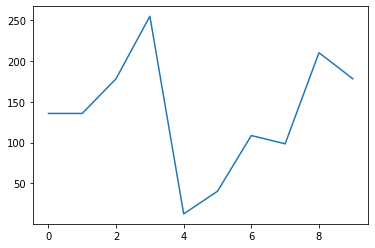

In [53]:
output = []

for t in range(0, spike_train.shape[0], time_window):
    spikes = spike_train[t:t+time_window]
    
    for k in range(time_window):
        if k>0 and spikes[k]==1:
            break #value of k is the required time period
    f = 1 / (k/1000)
    s = ((f-10)/190)*255
    output.append(s)

plt.plot(output)
plt.show()